<a href="https://colab.research.google.com/github/BOMBBAAM/AI-classworks/blob/main/K_means_A_study_of_Asian_Religious_and_Biblical_Texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means on Wine

## In class

1. Try to understand the notebook first, then ... 
2. Apply K-means on your own dataset

  - Pick from any where, or use one in https://scikit-learn.org/stable/datasets/index.html
  - Describe the dataset you pick

3. Find the right "K" (try to justify your decision)
4. Report the results (make it short)

**Write a report as a PDF (including screen shots if needed).** 



## Load the wine dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
%matplotlib inline 
from sklearn.cluster import KMeans

# A study of Asian Religious and Biblical Texts Data Set
# 590 samples with 8 distinct chapters 
# Features measure the number of words used in each chapter
# https://archive.ics.uci.edu/ml/datasets/A+study+of++Asian+Religious+and+Biblical+Texts
!gdown 1hhNOUKC4gHFdTta0yn5_c6PSjPgKm6U6

Downloading...
From: https://drive.google.com/uc?id=1hhNOUKC4gHFdTta0yn5_c6PSjPgKm6U6
To: /content/AllBooks_baseline_DTM_Labelled.csv
100% 9.83M/9.83M [00:00<00:00, 36.9MB/s]


In [54]:
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv', header=None,skiprows=1)
print(df.shape)
df.sample.head()

(590, 8267)


AttributeError: ignored

In [41]:
df[0] = df[0].str.split('_').str[0]
df[0].value_counts()

YogaSutra                189
Upanishad                162
TaoTeChing                81
BookOfEccleasiasticus     50
Buddhism                  46
BookOfProverb             31
BookOfWisdom              19
BookOfEcclesiastes        12
Name: 0, dtype: int64

In [42]:
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
y = df[df.columns[0]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (590, 8266) float32
y: (590,) object


## Cluster it!

In [45]:
from sklearn.cluster import KMeans
# again we know that it has 3 classes
model = KMeans(n_clusters=8) 
model.fit(X)
y_pred = model.predict(X)
print(y_pred.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(590,)


### Assesing the clustering quality 

If we have ground truth labels, we can use a method called "Adjusted Rand Index" (best = 1, worst ~ 0 or -1). 

Read more: https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

In [46]:
from sklearn import metrics
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.20679677249738687


### Better clustering quality with input normalization 

Because K-means make assumption that features should have equal variances. 

We should standardize the input before clustering. 

Read more: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [47]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3) 
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 0.0033898305 0.058123488
after mean and sd: 0.0 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI after normalized: 0.002303153215963574


#### Don't even need to zero the mean

In [48]:
# don't even need to zero the mean!
scaler = StandardScaler(with_mean=False, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3) 
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 0.0033898305 0.058123488
after mean and sd: 0.058321185 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI after normalized: 0.0023766445900204576


### Wrap as a pipeline

In [49]:
# Pipelines combine multiple steps ** Wrap up the above as a pipeline
from sklearn.preprocessing import StandardScaler # MaxAbsScaler and Normalizer are other examples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
y_pred = pipeline.predict(X)
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI: 0.00026009301718220616


# Selecting the "K" with Elbow method

In [56]:
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1,50+1,5)
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 10%|█         | 1/10 [00:00<00:08,  1.11it/s]/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 20%|██        | 2/10 [00:03<00:15,  2.00s/it]/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 30%|███       | 3/10 [00:09<00:25,  3.68s/it]/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

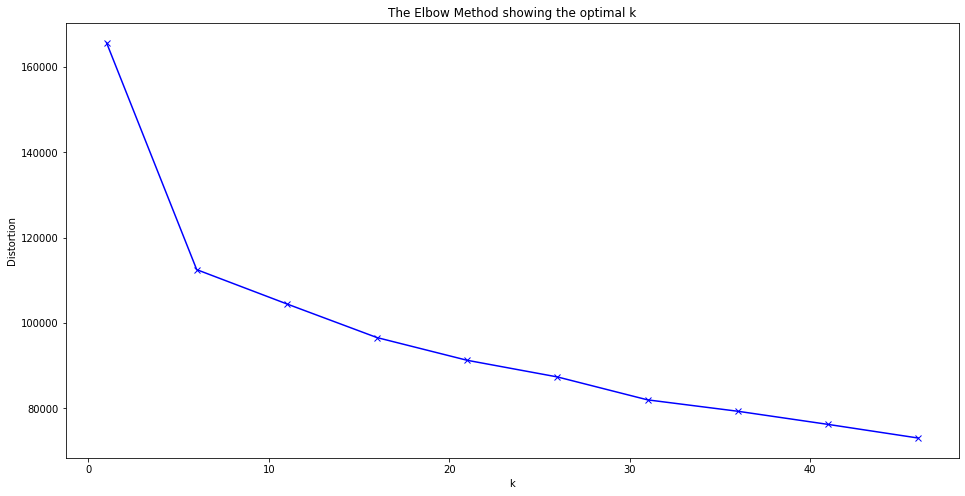

In [57]:
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()